In [1]:
import pandas as pd
import random
import os

In [2]:
# Projections
antiinfective_eos2db3 = ("eos2db3", pd.read_csv("../data/libraries/antiinfective_eos2db3.csv"))

# Saureus
antiinfective_eos2m0f = ("eos2m0f", pd.read_csv("../data/libraries/antiinfective_eos2m0f.csv"))

# Abaumannii
antiinfective_eos5dti = ("eos5dti", pd.read_csv("../data/libraries/antiinfective_eos5dti.csv"))

# ADMET
antiinfective_eos7m30 = ("eos7m30", pd.read_csv("../data/libraries/antiinfective_eos7m30.csv"))

# Saureus external
antiinfective_eos18ie = ("eos18ie", pd.read_csv("../data/libraries/antiinfective_eos18ie.csv"))

# Kpneumoniae
antiinfective_eos37l0 = ("eos37l0", pd.read_csv("../data/libraries/antiinfective_eos37l0.csv"))

# Cytotoxicity
antiinfective_eos42ez = ("eos42ez", pd.read_csv("../data/libraries/antiinfective_eos42ez.csv"))

# Abaumannii external
antiinfective_eos3804 = ("eos3804", pd.read_csv("../data/libraries/antiinfective_eos3804.csv"))

In [3]:
# Get the compounds
df = antiinfective_eos18ie[1][['key', 'input']]

# Create a list of df
all_dfs = [
    antiinfective_eos18ie,
    antiinfective_eos2db3,
    antiinfective_eos2m0f,
    antiinfective_eos37l0,
    antiinfective_eos7m30,
    antiinfective_eos42ez,
    antiinfective_eos3804,
    antiinfective_eos5dti,
]

# Merge everything
for model_id, ds in all_dfs:
    columns = [c for c in list(ds.columns) if c not in ["key", "input"]]
    ds = ds[columns]
    rename = dict((k, model_id + "_" + k) for k in columns)
    ds = ds.rename(columns=rename)
    df = pd.concat([df, ds], axis=1)

In [4]:
### KPNEUMONIAE ###

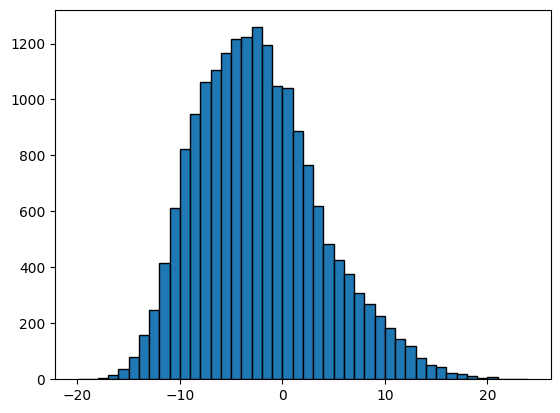

In [5]:
import matplotlib.pyplot as plt
plt.hist(df["eos37l0_0_consensus_score"], bins=[i for i in range(-20, 25, 1)], ec='k')
plt.show()

In [6]:
# QED

In [7]:
a_kp = set(df[(df["eos37l0_0_consensus_score"] > 10) & 
              (df["eos7m30_qed"] > 0.7)]['input'])
print(len(a_kp))

53


In [8]:
b_kp = set(df[(df["eos37l0_0_consensus_score"] > 10) & 
              (df["eos7m30_qed"] < 0.25)]['input'])
print(len(b_kp))

58


In [9]:
c_kp = set(df[(df["eos37l0_0_consensus_score"] < 10) & 
              (df["eos7m30_qed"] > 0.93)]['input'])
print(len(c_kp))

72


In [10]:
# CYTOTOXICITY

In [11]:
d_kp = set(df[(df["eos37l0_0_consensus_score"] > 10) & 
              (df['eos42ez_cytotoxicity_hepg2'] < 0.1) & 
              (df['eos42ez_cytotoxicity_hskmc'] < 0.1) & 
              (df['eos42ez_cytotoxicity_imr90'] < 0.1)]['input'])
print(len(d_kp))

112


In [12]:
e_kp = set(df[(df["eos37l0_0_consensus_score"] > 10) & 
              (df['eos42ez_cytotoxicity_hepg2'] > 0.4) & 
              (df['eos42ez_cytotoxicity_hskmc'] > 0.4) & 
              (df['eos42ez_cytotoxicity_imr90'] > 0.4)]['input'])
print(len(e_kp))

36


In [13]:
f_kp = set(df[(df["eos37l0_0_consensus_score"] < 10) & 
              (df['eos42ez_cytotoxicity_hepg2'] < 0.03) & 
              (df['eos42ez_cytotoxicity_hskmc'] < 0.03) & 
              (df['eos42ez_cytotoxicity_imr90'] < 0.03)]['input'])
print(len(f_kp))

40


In [15]:
# HERG

In [16]:
g_kp = set(df[(df["eos37l0_0_consensus_score"] > 10) & 
              (df["eos7m30_herg"] > 0.9)]['input'])
print(len(g_kp))

82


In [17]:
h_kp = set(df[(df["eos37l0_0_consensus_score"] < 10) & 
              (df["eos7m30_herg"] < 0.03)]['input'])
print(len(h_kp))

64


In [18]:
i_kp = set(df[(df["eos37l0_0_consensus_score"] > 10) & 
              (df["eos7m30_herg"] < 0.3)]['input'])
print(len(i_kp))

66


In [ ]:
# BIOAVAILABILITY

In [19]:
j_kp = set(df[(df["eos37l0_0_consensus_score"] > 10) & 
              (df["eos7m30_bioavailability_ma"] > 0.9)]['input'])
print(len(j_kp))

150


In [20]:
k_kp = set(df[(df["eos37l0_0_consensus_score"] > 10) & 
              (df["eos7m30_bioavailability_ma"] < 0.5)]['input'])
print(len(k_kp))

29


In [21]:
l_kp = set(df[(df["eos37l0_0_consensus_score"] < 10) & 
              (df["eos7m30_bioavailability_ma"] > 0.985)]['input'])
print(len(l_kp))

62


In [22]:
# VEITH

In [23]:
m_kp = set(df[(df["eos37l0_0_consensus_score"] > 15) & 
              (df["eos7m30_cyp1a2_veith"] < 0.05)]['input'])
print(len(m_kp))

56


In [24]:
n_kp = set(df[(df["eos37l0_0_consensus_score"] > 10) & 
              (df["eos7m30_cyp1a2_veith"] > 0.7)]['input'])
print(len(n_kp))

58


In [25]:
o_kp = set(df[(df["eos37l0_0_consensus_score"] < -10) & 
              (df["eos7m30_cyp1a2_veith"] < 0.1)]['input'])
print(len(o_kp))

61


In [26]:
SELECTED = a_kp.union(b_kp).union(c_kp).union(d_kp).union(e_kp).union(f_kp).union(g_kp).union(h_kp).union(i_kp).union(j_kp).union(k_kp).union(l_kp).union(m_kp).union(n_kp).union(o_kp)
len(SELECTED)

753

In [27]:
random.seed(42)
not_selected = [i for i in df['input'] if i not in SELECTED]
selected = random.sample(not_selected, 1000 - len(SELECTED))
SELECTED = SELECTED.union(set(selected))

with open("./kpneumoniae_compounds.csv", "w") as out:
    out.write("\n".join(sorted(SELECTED)))

In [28]:
### ABAUMANNII ###

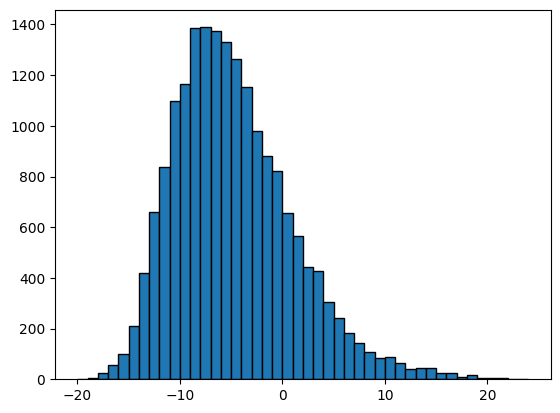

In [29]:
import matplotlib.pyplot as plt
plt.hist(df["eos5dti_0_consensus_score"], bins=[i for i in range(-20, 25, 1)], ec='k')
plt.show()

In [30]:
# QED

In [31]:
a_ab = set(df[(df["eos5dti_0_consensus_score"] > 10) & 
              (df["eos7m30_qed"] > 0.7)]['input'])
print(len(a_ab))

29


In [32]:
b_ab = set(df[(df["eos5dti_0_consensus_score"] > 10) & 
              (df["eos7m30_qed"] < 0.25)]['input'])
print(len(b_ab))

81


In [33]:
c_ab = set(df[(df["eos5dti_0_consensus_score"] < 10) & 
              (df["eos7m30_qed"] > 0.93)]['input'])
print(len(c_ab))

72


In [34]:
# CYTOTOXICITY

In [35]:
d_ab = set(df[(df["eos5dti_0_consensus_score"] > 10) & 
              (df['eos42ez_cytotoxicity_hepg2'] < 0.1) & 
              (df['eos42ez_cytotoxicity_hskmc'] < 0.1) & 
              (df['eos42ez_cytotoxicity_imr90'] < 0.1)]['input'])
print(len(d_ab))

31


In [36]:
e_ab = set(df[(df["eos5dti_0_consensus_score"] > 10) & 
              (df['eos42ez_cytotoxicity_hepg2'] > 0.4) & 
              (df['eos42ez_cytotoxicity_hskmc'] > 0.4) & 
              (df['eos42ez_cytotoxicity_imr90'] > 0.4)]['input'])
print(len(e_ab))

35


In [37]:
f_ab = set(df[(df["eos5dti_0_consensus_score"] < 10) & 
              (df['eos42ez_cytotoxicity_hepg2'] < 0.03) & 
              (df['eos42ez_cytotoxicity_hskmc'] < 0.03) & 
              (df['eos42ez_cytotoxicity_imr90'] < 0.03)]['input'])
print(len(f_ab))

43


In [38]:
# HERG

In [39]:
g_ab = set(df[(df["eos5dti_0_consensus_score"] > 10) & 
              (df["eos7m30_herg"] > 0.9)]['input'])
print(len(g_ab))

100


In [40]:
h_ab = set(df[(df["eos5dti_0_consensus_score"] < 10) & 
              (df["eos7m30_herg"] < 0.03)]['input'])
print(len(h_ab))

71


In [41]:
i_ab = set(df[(df["eos5dti_0_consensus_score"] > 10) & 
              (df["eos7m30_herg"] < 0.3)]['input'])
print(len(i_ab))

32


In [42]:
# BIOAVAILABILITY

In [43]:
j_ab = set(df[(df["eos5dti_0_consensus_score"] > 10) & 
              (df["eos7m30_bioavailability_ma"] > 0.9)]['input'])
print(len(j_ab))

20


In [44]:
k_ab = set(df[(df["eos5dti_0_consensus_score"] > 10) & 
              (df["eos7m30_bioavailability_ma"] < 0.5)]['input'])
print(len(k_ab))

38


In [45]:
l_ab = set(df[(df["eos5dti_0_consensus_score"] < 10) & 
              (df["eos7m30_bioavailability_ma"] > 0.985)]['input'])
print(len(l_ab))

62


In [46]:
# VEITH

In [47]:
m_ab = set(df[(df["eos5dti_0_consensus_score"] > 15) & 
              (df["eos7m30_cyp1a2_veith"] < 0.05)]['input'])
print(len(m_ab))

60


In [48]:
n_ab = set(df[(df["eos5dti_0_consensus_score"] > 10) & 
              (df["eos7m30_cyp1a2_veith"] > 0.7)]['input'])
print(len(n_ab))

28


In [49]:
o_ab = set(df[(df["eos5dti_0_consensus_score"] < -15) & 
              (df["eos7m30_cyp1a2_veith"] < 0.1)]['input'])
print(len(o_ab))

5


In [50]:
# abaumannii external

In [51]:
p_ab = set(df[(df["eos5dti_0_consensus_score"] > 15) & 
              (df["eos3804_abaumannii_inhibition_probability"] < 0.1)]['input'])
print(len(p_ab))

99


In [52]:
q_ab = set(df[(df["eos5dti_0_consensus_score"] > 5) & 
              (df["eos3804_abaumannii_inhibition_probability"] > 0.4)]['input'])
print(len(q_ab))

6


In [53]:
SELECTED = a_ab.union(b_ab).union(c_ab).union(d_ab).union(e_ab).union(f_ab).union(g_ab).union(h_ab).union(i_ab).union(j_ab).union(k_ab).union(l_ab).union(m_ab).union(n_ab).union(o_ab).union(p_ab).union(q_ab)
len(SELECTED)

532

In [54]:
random.seed(42)
not_selected = [i for i in df['input'] if i not in SELECTED]
selected = random.sample(not_selected, 1000 - len(SELECTED))
SELECTED = SELECTED.union(set(selected))
COLORS = ['green', 'blue', 'yellow']

for color in COLORS:
    with open(f"./abaumanni_compounds_{color}.csv", "w") as out:
        l = sorted(SELECTED)
        random.shuffle(l)
        out.write("\n".join(l))

In [55]:
### SAUREUS ###

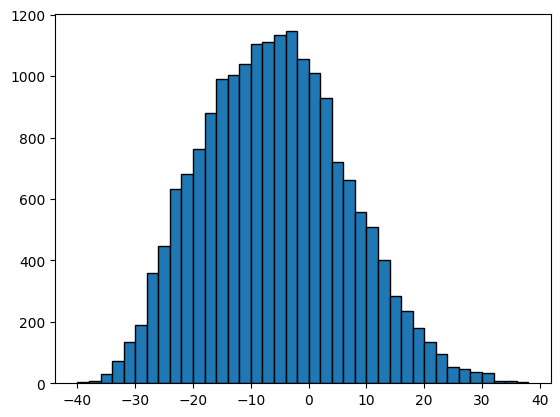

In [56]:
import matplotlib.pyplot as plt
plt.hist(df["eos2m0f_0_consensus_score"], bins=[i for i in range(-40, 40, 2)], ec='k')
plt.show()

In [57]:
# QED

In [58]:
a_sa = set(df[(df["eos2m0f_0_consensus_score"] > 15) & 
              (df["eos7m30_qed"] > 0.7)]['input'])
print(len(a_sa))

86


In [59]:
b_sa = set(df[(df["eos2m0f_0_consensus_score"] > 20) & 
              (df["eos7m30_qed"] < 0.25)]['input'])
print(len(b_sa))

70


In [60]:
c_sa = set(df[(df["eos2m0f_0_consensus_score"] < 10) & 
              (df["eos7m30_qed"] > 0.93)]['input'])
print(len(c_sa))

72


In [61]:
# CYTOTOXICITY

In [62]:
d_sa = set(df[(df["eos2m0f_0_consensus_score"] > 15) & 
              (df['eos42ez_cytotoxicity_hepg2'] < 0.1) & 
              (df['eos42ez_cytotoxicity_hskmc'] < 0.1) & 
              (df['eos42ez_cytotoxicity_imr90'] < 0.1)]['input'])
print(len(d_sa))

90


In [63]:
e_sa = set(df[(df["eos2m0f_0_consensus_score"] > 15) & 
              (df['eos42ez_cytotoxicity_hepg2'] > 0.4) & 
              (df['eos42ez_cytotoxicity_hskmc'] > 0.4) & 
              (df['eos42ez_cytotoxicity_imr90'] > 0.4)]['input'])
print(len(e_sa))

92


In [64]:
f_sa = set(df[(df["eos2m0f_0_consensus_score"] < 10) & 
              (df['eos42ez_cytotoxicity_hepg2'] < 0.03) & 
              (df['eos42ez_cytotoxicity_hskmc'] < 0.03) & 
              (df['eos42ez_cytotoxicity_imr90'] < 0.03)]['input'])
print(len(f_sa))

36


In [65]:
# HERG

In [66]:
g_sa = set(df[(df["eos2m0f_0_consensus_score"] > 15) & 
              (df["eos7m30_herg"] > 0.95)]['input'])
print(len(g_sa))

64


In [67]:
h_sa = set(df[(df["eos2m0f_0_consensus_score"] < 10) & 
              (df["eos7m30_herg"] < 0.03)]['input'])
print(len(h_sa))

65


In [68]:
i_sa = set(df[(df["eos2m0f_0_consensus_score"] > 10) & 
              (df["eos7m30_herg"] < 0.3)]['input'])
print(len(i_sa))

78


In [69]:
# BIOAVAILABILITY

In [70]:
j_sa = set(df[(df["eos2m0f_0_consensus_score"] > 15) & 
              (df["eos7m30_bioavailability_ma"] > 0.93)]['input'])
print(len(j_sa))

50


In [71]:
k_sa = set(df[(df["eos2m0f_0_consensus_score"] > 15) & 
              (df["eos7m30_bioavailability_ma"] < 0.5)]['input'])
print(len(k_sa))

71


In [72]:
l_sa = set(df[(df["eos2m0f_0_consensus_score"] < 10) & 
              (df["eos7m30_bioavailability_ma"] > 0.985)]['input'])
print(len(l_sa))

62


In [73]:
# VEITH

In [74]:
m_sa = set(df[(df["eos2m0f_0_consensus_score"] > 18) & 
              (df["eos7m30_cyp1a2_veith"] < 0.02)]['input'])
print(len(m_sa))

94


In [75]:
n_sa = set(df[(df["eos2m0f_0_consensus_score"] > 15) & 
              (df["eos7m30_cyp1a2_veith"] > 0.8)]['input'])
print(len(n_sa))

54


In [76]:
o_sa = set(df[(df["eos2m0f_0_consensus_score"] < 15) & 
              (df["eos7m30_cyp1a2_veith"] < 0.001)]['input'])
print(len(o_sa))

28


In [77]:
# saureus external

In [78]:
p_sa = set(df[(df["eos2m0f_0_consensus_score"] > 23) & 
              (df["eos18ie_saureus_inhibition_probability"] < 0.01)]['input'])
print(len(p_sa))

73


In [79]:
q_sa = set(df[(df["eos2m0f_0_consensus_score"] > 5) & 
              (df["eos18ie_saureus_inhibition_probability"] > 0.3)]['input'])
print(len(q_sa))

4


In [80]:
SELECTED = a_sa.union(b_sa).union(c_sa).union(d_sa).union(e_sa).union(f_sa).union(g_sa).union(h_sa).union(i_sa).union(j_sa).union(k_sa).union(l_sa).union(m_sa).union(n_sa).union(o_sa).union(p_sa).union(q_sa)
len(SELECTED)

805

In [81]:
random.seed(42)
not_selected = [i for i in df['input'] if i not in SELECTED]
selected = random.sample(not_selected, 1000 - len(SELECTED))
SELECTED = SELECTED.union(set(selected))
COLORS = ['orange', 'pink']

for color in COLORS:
    with open(f"./saureus_compounds_{color}.csv", "w") as out:
        l = sorted(SELECTED)
        random.shuffle(l)
        out.write("\n".join(l))